In [5]:
import os
from glob import glob
linelist = []
for line in glob(os.path.join('sample','*.jpg')):
    linelist.append(line)

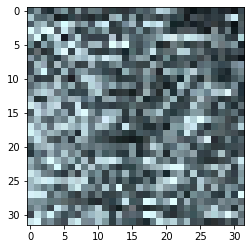

In [13]:
for image_dir in linelist:
    image_dir = cv2.imread(image_dir)
    img = cv2.resize(image_dir,(32,32))
    
#     plt.imshow(img)

In [8]:
image_dir = aimage_dir[:,:,::-1] #cv2讀入時是bgr，所以要將其反過來

array([[[121, 144, 152],
        [113, 136, 144],
        [106, 127, 135],
        ...,
        [ 99, 114, 117],
        [101, 115, 121],
        [ 98, 112, 118]],

       [[109, 130, 138],
        [105, 128, 136],
        [ 98, 119, 127],
        ...,
        [ 71,  83,  89],
        [ 90, 102, 108],
        [103, 115, 121]],

       [[104, 126, 132],
        [105, 127, 133],
        [102, 123, 131],
        ...,
        [ 54,  66,  72],
        [ 79,  89,  96],
        [ 96, 106, 113]],

       ...,

       [[156, 185, 194],
        [143, 174, 183],
        [155, 186, 195],
        ...,
        [ 87, 106, 113],
        [ 76,  95, 102],
        [ 56,  75,  82]],

       [[184, 213, 222],
        [172, 200, 211],
        [173, 208, 218],
        ...,
        [121, 140, 147],
        [114, 133, 140],
        [ 89, 108, 115]],

       [[169, 199, 210],
        [156, 188, 199],
        [169, 201, 212],
        ...,
        [128, 147, 154],
        [130, 149, 156],
        [122, 141, 148]]

In [9]:
image_dir.shape

(1525, 1242, 3)

In [1]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import radiomics
import radiomics.featureextractor
import radiomics.featureextractor
import SimpleITK as sitk

# 分類
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import logging
radiomics.logger.setLevel(logging.CRITICAL)

extractor = radiomics.featureextractor.RadiomicsFeatureExtractor()
extractor.enableAllImageTypes()
extractor.settings['force2D'] = True

original_image = cv2.imread('after/010.jpg', 0)
r, c = original_image.shape
crop_size = 100

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
#%%
fvs = []
j=0
r_crop_list = np.arange(0, r-crop_size, crop_size)
for r_crop in r_crop_list:
    if r_crop in [r_crop_list[0], r_crop_list[1], r_crop_list[-1], r_crop_list[-2]]:
        c_crop_list = np.arange(0, c-crop_size, crop_size)
    # if i==1 or i==2:
    # elif r_crop == r-crop_size or r_crop == r-2*crop_size:
    #     c_crop_list = np.arange(0, c - crop_size, 100)
    else:
        c_crop_list = np.array([0,crop_size,c-2*crop_size, c-crop_size])

    for c_crop in c_crop_list:
        image = sitk.GetImageFromArray(original_image[r_crop:r_crop + crop_size, c_crop:c_crop + crop_size])
        if j == 0:
            mask_array = np.ones(image.GetSize()[::-1], dtype='int')
            mask = sitk.GetImageFromArray(mask_array)
            mask.CopyInformation(image)
            j=1

        # 抓feature
        feature_vector = extractor.execute(image, mask)
        feature_vector = np.array([v for k, v in feature_vector.items()][22:])
        fvs.append(feature_vector)

        print(r_crop, c_crop)
    # print(i)

print(1111111111111)

#%% 算
std_1_1 = StandardScaler()
# pca1 = PCA(n_components=0.9)
pca1 = PCA(n_components=1)
std_1_2 = StandardScaler()


pipeline1 = Pipeline([
    ('std_1_1', std_1_1),
    ('pca1', pca1),
    ('std_1_2', std_1_2),
])
# pipeline1.fit(fvs)
pcafvs = pipeline1.fit_transform(fvs)

detect = []
# 1400, 2100
for r_crop in np.arange(crop_size*2, r - 2*crop_size, crop_size):
    for c_crop in np.arange(crop_size*2, c - 2*crop_size, crop_size):

        image = sitk.GetImageFromArray(original_image[r_crop:r_crop + crop_size, c_crop:c_crop + crop_size])
        # image = original_image[r_crop:r_crop+crop_size, c_crop:c_crop+crop_size]

        feature_vector = extractor.execute(image, mask)
        feature_vector = np.array([v for k, v in feature_vector.items()][22:])

        value = pipeline1.transform(feature_vector.reshape(1, -1))
        detect.append(value)

        if value < pcafvs.min() or value > pcafvs.max():
        # if abs(value) > 3:
            print(r_crop, c_crop, value)


# ddd = original_image[1500:1500 + crop_size, 1400:1400 + crop_size]
# feature_vector = extractor.execute(sitk.GetImageFromArray(ddd), mask)
# feature_vector = np.array([v for k, v in feature_vector.items()][22:])
# value = pipeline1.transform(feature_vector.reshape(1, -1))